# STEP 1: Site map

We’ll need some Python libraries to complete this workflow.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import necessary libraries</div></div><div class="callout-body-container callout-body"><p>In the cell below, making sure to keep the packages in order, add
packages for:</p>
<ul>
<li>Working with DataFrames</li>
<li>Working with GeoDataFrames</li>
<li>Making interactive plots of tabular and vector data</li>
</ul></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What are we using the rest of these packages for? See if you can
figure it out as you complete the notebook.</p></div></div>

In [3]:
import json
import os
import pathlib

import hvplot.xarray
import rioxarray as rxr
import xarray as xr

import pandas as pd  # work with tabular data
import geopandas as gpd  # work with geodataframes
import hvplot.pandas # make interactive plots

# work with open street maps {osm}
from osmnx import features as osm
import osmnx as ox

import earthpy  # work with 'canned' data

We have one more setup task. We’re not going to be able to load all our
data directly from the web to Python this time. That means we need to
set up a place for it.

> **GOTCHA ALERT!**
>
> A lot of times in Python we say “directory” to mean a “folder” on your
> computer. The two words mean the same thing in this context.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>In the cell below, replace ‘my-data-folder’ with a
<strong>descriptive</strong> directory name.</p></div></div>

In [4]:

# create directory for our data
project = earthpy.Project("Gila River Vegetation", dirname='gila-vegetation-data')
project.get_data()


**Final Configuration Loaded:**
{}
Found 'data_home' in environment variables.
🔄 Fetching metadata for article 29170118...
✅ Found 2 files for download.
[('https://ndownloader.figshare.com/files/54896600', 'tl_2020_us_aitsn', 'zip'), ('https://ndownloader.figshare.com/files/55242452', 'gila-river-ndvi', 'zip')]
tl_2020_us_aitsn
Extracted output to /workspaces/data/gila-vegetation-data/tl_2020_us_aitsn
[PosixPath('/workspaces/data/gila-vegetation-data/tl_2020_us_aitsn')]
gila-river-ndvi
Extracted output to /workspaces/data/gila-vegetation-data/gila-river-ndvi
[PosixPath('/workspaces/data/gila-vegetation-data/tl_2020_us_aitsn'), PosixPath('/workspaces/data/gila-vegetation-data/gila-river-ndvi')]


# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [5]:
%store -r

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [6]:
# Import libraries

## Study Area: **?meta:params.site_name**

### Earth Data Science data formats

In Earth Data Science, we get data in three main formats:

| Data type | Descriptions | Common file formats | Python type |
|------------------|------------------|------------------|------------------|
| Time Series | The same data points (e.g. streamflow) collected multiple times over time | Tabular formats (e.g. .csv, or .xlsx) | pandas DataFrame |
| Vector | Points, lines, and areas (with coordinates) | Shapefile (often an archive like a `.zip` file because a Shapefile is actually a collection of at least 3 files) | geopandas GeoDataFrame |
| Raster | Evenly spaced spatial grid (with coordinates) | GeoTIFF (`.tif`), NetCDF (`.nc`), HDF (`.hdf`) | rioxarray DataArray |

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Check out the sections about about <a
href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/">vector
data</a> and <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-raster-data/">raster
data</a> in the textbook.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>For this coding challenge, we are interested in the boundary of the
<span data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>, and the health of vegetation in the
area measured on a scale from -1 to 1. In the cell below, answer the
following question: <strong>What data type do you think the boundary
will be? What about the vegetation health?</strong></p></div></div>

YOUR ANSWER HERE

### Load the **?meta:params.site_name** boundary

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ul>
<li>Locate the Tribal Subdivision files in your download directory</li>
<li>Change <code>'subdivision-directory'</code> to the actual
location</li>
<li>Load the data into Python and check that it worked</li>
</ul></div></div>

In [7]:
# Load in the boundary data
aitsn_gdf = gpd.read_file(project.project_dir / 'subdivision-directory')
# Check that it worked

You might notice in this dataset that some of the names are not easily
searchable. For example, the Gila River subdivisions are named “District
1-7”! So, how do we know what to search for? We recommend making an
**interactive** plot of the data so that you can find the information
you need, e.g.:

In [9]:
aitsn_gdf.hvplot(
    geo=True, tiles='EsriImagery', 
    frame_width=500,
    legend=False, fill_color=None, edge_color='white',
    # This parameter makes all the column values in the dataset visible.
    hover_cols='all')

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What column could you use to uniquely identify the subdivisions of
the reservation you want to study using this interactive map? What value
do you need to use to filter the <code>GeoDataFrame</code>?</p></div></div>

YOUR ANSWER HERE

Now that you have the info you need, it’s also a good idea to check the
data type. For example, we suggest looking at the `AIANNHCE` column…but
is that value some kind of **number** or an **object** like a text
string? We can’t tell just by looking, which is where our friend the
`.info()` method comes in:

In [10]:
aitsn_gdf.info()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What is the data type of the <code>AIANNHCE</code> column? How will
that affect your code?</p></div></div>

YOUR ANSWER HERE

Let’s go ahead and select the Gila River subdivisions, and make a site
map.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>identifier</code> with the value you found from
exploring the interactive map. Make sure that you are using the correct
<strong>data type</strong>!</li>
<li>Change the plot to have a web tile basemap, and look the way you
want it to.</li>
</ol></div></div>

In [11]:
# Select and merge the subdivisions you want
gdf = aitsn_gdf.loc[aitsn_gdf.AIANNHCE==identifier].dissolve()
# Plot the results with web tile images
gdf.hvplot()

In [12]:
# Select and merge the subdivisions you want
boundary_gdf = aitsn_gdf.loc[aitsn_gdf.AIANNHCE=='1310'].dissolve()
# Plot the results with web tile images
boundary_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    fill_color=None, line_color='black',
    title=site_name,
    frame_width=500)

In [5]:
# bring in boundary data using OSM
reservation_name = 'Gila River Indian Community'
tags = {'boundary': 'aboriginal_lands', 'name': reservation_name}

gric_gdf = ox.features_from_place(reservation_name, tags)
gric_gdf

geometry  \
element  id                                                            
relation 10731873  POLYGON ((-112.30618 33.38051, -112.30222 33.3...   
         13699756  POLYGON ((-112.11752 33.07258, -112.10134 33.0...   

                                                                name  \
element  id                                                            
relation 10731873  Gila River Indian Community / Keli Akimel Oʼot...   
         13699756        Ak-Chin Indian Community / ʼAkĭ Ciñ O'odham   

                                       name:en             name:ood  wikidata  \
element  id                                                                     
relation 10731873  Gila River Indian Community  Keli Akimel Oʼotham  Q1427305   
         13699756     Ak-Chin Indian Community     ʼAkĭ Ciñ O'odham   Q356979   

                                        wikipedia          boundary  \
element  id                                                           
relation 10731873  en:Gila River Indian Community  aboriginal_lands   
         13699756     en:Ak-Chin Indian Community  aboriginal_lands   

                                                              source  \
element  id                                                            
relation 10731873                                                NaN   
         13699756  https://www.census.gov/geo/maps-data/data/kml/...   

                       type  name:mrc                          url  \
element  id                                                          
relation 10731873  boundary  Pee-Posh    http://www.gilariver.org/   
         13699756  boundary       NaN  https://www.ak-chin.nsn.us/   

                                   alt_name:en  \
element  id                                      
relation 10731873                          NaN   
         13699756  Maricopa Indian Reservation   

                                                    official_name:en  
element  id                                                           
relation 10731873                                                NaN  
         13699756  Ak Chin Indian Community of the Maricopa India...

In [6]:
# select out GRIC
gric_boundary = gric_gdf[gric_gdf['name:ood']=='Keli Akimel Oʼotham']
gric_boundary

,,geometry,name,name:en,name:ood,wikidata,wikipedia,boundary,source,type,name:mrc,url,alt_name:en,official_name:en
element,id,,,,,,,,,,,,,
relation,10731873,"POLYGON ((-112.30618 33.38051, -112.30222 33.3...",Gila River Indian Community / Keli Akimel Oʼot...,Gila River Indian Community,Keli Akimel Oʼotham,Q1427305,en:Gila River Indian Community,aboriginal_lands,NaN,boundary,Pee-Posh,http://www.gilariver.org/,NaN,NaN


<Axes: >

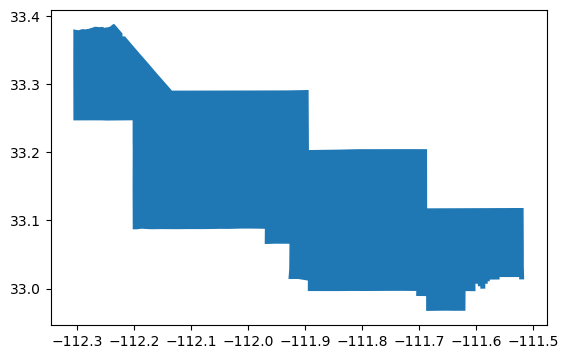

In [7]:
# plot the boundary
gric_boundary.plot()

In [8]:
# make interactive plot of GRIC Boundary
gric_boundary.hvplot(
    geo=True, tiles='EsriImagery', 
    frame_width=500,
    legend=False, fill_color=None, edge_color='white')

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [9]:
%store gric_boundary project

Stored 'gric_boundary' (GeoDataFrame)
Stored 'project' (Project)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!